In [ ]:
import pandas as pd
import psycopg2
import time
import numpy as np
import re
from datetime import timedelta
import pickle
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [146]:
COMPUTER_NAME = ['panda','thylacine','komodo','gila']
CUR_DIR = os.getcwd()
DATA_DIR = CUR_DIR + '/Extract_data/'
SAVE_DIR = CUR_DIR + '/Output/output_5/'


if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [156]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

# Load data

In [148]:
cluster_df = pd.read_csv(DATA_DIR + "cluster_april_22.csv")
cluster_df = cluster_df.rename(columns={'Subject_id':'subject_id'})
cluster_df

,subject_id,cluster_labels
0,AXSW,1
1,BHGY,3
2,BVCX,3
3,CVBN,1
4,DFGH,1
5,DFZX,1
6,DKLQ,1
7,EDFR,2
8,FDSA,1
9,FDXC,2


In [149]:
shooting_df = pd.read_csv(DATA_DIR + "heart_rate_shooting_game.csv")
shooting_df = pd.merge(shooting_df,cluster_df,on='subject_id',how='left')
shooting_df = shooting_df.replace('baseline','shooting_baseline')
shooting_df = shooting_df.rename(columns={'block_type':'game_type'})
shooting_df

,subject_id,computer_name,game_type,hr_mean,hr_max,hr_min,heart_rate_variability,snr_values,start_time,end_time,workload,cluster_labels
0,EDFR,mammal_panda,shooting_baseline,"[90.71884287767276, 90.53768858069103, 90.2537...","[102.04088881536292, 102.04088881536292, 102.0...","[84.26964734483123, 84.26964734483123, 84.2696...","[16.399785026557797, 15.889890099634755, 14.00...","[6.4596347987266025, 6.469030541974598, 6.4558...","[1712690031.0352373, 1712690032.0352373, 17126...","[1712690061.0352373, 1712690062.0352373, 17126...","[0.3972630500793457, 0.3774046003818512, 0.337...",2
1,EDFR,mammal_panda,block_01,"[94.28375271973553, 94.15796232666496, 94.1161...","[103.44820442159282, 102.73970656557286, 103.4...","[83.33333002196431, 83.33333002196431, 83.3333...","[19.585919745480158, 19.49605824648644, 19.714...","[6.498243535103615, 6.647450638921232, 6.66762...","[1712690707.5706294, 1712690708.5706294, 17126...","[1712690737.5706294, 1712690738.5706294, 17126...","[0.6966437697410583, 0.6849216222763062, 0.685...",2
2,EDFR,mammal_panda,block_02,"[90.57860623428945, 91.15959687906414, 91.2140...","[96.77421141117675, 99.99997615814777, 99.9999...","[81.52173236998414, 81.52173236998414, 81.5217...","[21.71636792698553, 21.954507870312174, 22.671...","[6.512274890649863, 6.510433503317268, 6.52492...","[1712691652.6205168, 1712691653.6205168, 17126...","[1712691682.6205168, 1712691683.6205168, 17126...","[0.3329460918903351, 0.385335236787796, 0.3966...",2
3,EDFR,mammal_panda,block_03,"[91.15438169816801, 90.8287098673794, 90.72851...","[102.73970656557286, 102.73970656557286, 102.7...","[77.72017576259942, 76.14214469650187, 76.1421...","[25.90788511639349, 24.5576260170856, 24.69091...","[6.529359477225646, 6.6211698307016755, 6.6304...","[1712692657.4177406, 1712692658.4177406, 17126...","[1712692687.4177406, 1712692688.4177406, 17126...","[0.3617091178894043, 0.39754578471183777, 0.39...",2
4,EDFR,mammal_panda,block_04,"[94.19660680370845, 94.37977663535663, 94.4378...","[104.16667115081259, 104.16667115081259, 104.1...","[86.20688426697944, 86.20688426697944, 86.2068...","[13.053778904156031, 13.053775251172436, 13.11...","[6.401054542140584, 6.617534320809227, 6.62687...","[1712693581.0007808, 1712693582.0007808, 17126...","[1712693611.0007808, 1712693612.0007808, 17126...","[0.7251088619232178, 0.7377746105194092, 0.741...",2
5,HGFD,mammal_panda,shooting_baseline,"[71.68179377561736, 71.81442218864447, 71.4496...","[85.71430906958146, 85.71430906958146, 85.7143...","[60.97561176537576, 60.97561176537576, 60.9756...","[24.64718760274495, 25.12513302066362, 25.3080...","[10.326087626676472, 10.377162028685094, 10.45...","[1712680506.9184604, 1712680507.9184604, 17126...","[1712680536.9184604, 1712680537.9184604, 17126...","[0.6212003231048584, 0.6189649105072021, 0.609...",1
6,HGFD,mammal_panda,block_01,"[82.03865690068933, 82.24506648281185, 82.3680...","[89.8203615896238, 89.8203615896238, 89.820361...","[75.75754766112063, 75.75754766112063, 75.7575...","[14.316885519327313, 14.877274726474498, 14.95...","[11.046862624177065, 11.118860628326372, 11.01...","[1712681122.5312972, 1712681123.5312972, 17126...","[1712681152.5312972, 1712681153.5312972, 17126...","[0.8877148628234863, 0.8991986513137817, 0.904...",1
7,HGFD,mammal_panda,block_02,"[85.75297880229478, 85.80498146005621, 85.2612...","[95.54139808194537, 95.54139808194537, 95.5413...","[70.75471284339443, 70.75471284339443, 70.7547...","[15.986167721248954, 14.910298181098707, 14.95...","[11.393842450683438, 11.523688945834651, 11.51...","[1712681970.1851313, 1712681971.1851313, 17126...","[1712682000.1851313, 1712682001.1851313, 17126...","[0.9582072496414185, 0.957542896270752, 0.9455...",1
8,HGFD,mammal_panda,block_03,"[82.00519137710607, 82.42303007135617, 82.6376...","[87.71929628875696, 87.71929628875696, 87.2093...","[67.87329833471107, 78.53401317980097, 78.5340...","[27.844463697806336, 12.521976138738108, 12.26...","[11.255651907928502, 11.32271612

In [150]:
cognitive_df = pd.read_csv(DATA_DIR + "heart_rate_cognitive_battery.csv")
cognitive_df = pd.merge(cognitive_df,cluster_df,on='subject_id',how='left')
cognitive_df = cognitive_df.replace('baseline','cognitive_baseline')
cognitive_df

,subject_id,game_type,hr_mean,hr_max,hr_min,heart_rate_variability,snr_values,start_time,end_time,workload,cluster_labels
0,BVCX,cognitive_baseline,"[79.72138982869055, 79.22697978327422, 79.1023...","[87.71929628875696, 85.22727318908558, 84.7457...","[72.46376210665257, 72.46376210665257, 72.4637...","[24.722428795261873, 24.583360800365462, 24.70...","[10.676791662252894, 10.661704202564033, 9.766...","[1710352670.22933, 1710352671.22933, 171035267...","[1710352700.22933, 1710352701.22933, 171035270...","[0.9336329698562622, 0.9127364158630371, 0.907...",3
1,BVCX,enumeration,"[84.8788220838373, 84.39150790998801, 83.88875...","[100.00001589457446, 100.00001589457446, 100.0...","[70.42253536892058, 70.42253536892058, 66.0792...","[27.744001187915337, 27.75077134365307, 27.216...","[10.62134448579082, 10.668230682615524, 10.624...","[1710354601.587721, 1710354602.587721, 1710354...","[1710354631.587721, 1710354632.587721, 1710354...","[0.9928626418113708, 0.9908316731452942, 0.973...",3
2,BVCX,task_switching,"[81.88608224589639, 81.83225534132796, 81.7423...","[92.59259232005192, 92.59259232005192, 92.5925...","[73.17073766423626, 75.3768840608794, 72.81554...","[19.075744505873097, 18.390773771317864, 19.52...","[10.726791147433604, 10.66326556590937, 10.710...","[1710354051.4275117, 1710354052.4275117, 17103...","[1710354081.4275117, 1710354082.4275117, 17103...","[0.9794681668281555, 0.9896671772003174, 0.975...",3
3,BVCX,working_memory,"[84.66176192926294, 84.85013738679885, 84.9203...","[90.90907908668356, 90.90907908668356, 92.0245...","[76.9230327192632, 78.94739417819285, 78.94739...","[20.621922851060503, 20.28222919398298, 20.438...","[10.69860762148294, 10.700581991378053, 10.726...","[1710353155.3258922, 1710353156.3258922, 17103...","[1710353185.3258922, 1710353186.3258922, 17103...","[0.9987045526504517, 0.9994053840637207, 0.999...",3
4,CVBN,cognitive_baseline,"[88.51570202952158, 88.59235015644737, 88.2813...","[105.63383261332021, 105.63383261332021, 105.6...","[71.09003887860796, 71.09003887860796, 70.7546...","[36.828126025973084, 35.98337970317507, 34.488...","[8.09452475911611, 8.08985108987985, 8.0854290...","[1710444844.91457, 1710444845.91457, 171044484...","[1710444874.91457, 1710444875.91457, 171044487...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1
...,...,...,...,...,...,...,...,...,...,...,...
395,YTRE,cognitive_baseline,"[89.09528717908047, 89.00052425595428, 88.1613...","[104.16671426762001, 104.16671426762001, 103.4...","[78.94736941171156, 83.33333002196431, 83.3333...","[16.13046231955859, 13.798588980552214, 13.899...","[8.677287013288566, 8.682410307230105, 8.63297...","[1711637723.7361555, 1711637724.7361555, 17116...","[1711637753.7361555, 1711637754.7361555, 17116...","[0.2652091085910797, 0.26866021752357483, 0.26...",1
396,YTRE,enumeration,"[92.01150053388456, 91.84158589526281, 91.8179...","[96.77421141117675, 96.77421141117675, 96.7742...","[86.20688426697944, 86.20688426697944, 86.2068...","[13.380882041219092, 13.828226398735412, 13.33...","[8.59034137840635, 8.574997718686726, 8.642434...","[1711638227.2988112, 1711638228.2988112, 17116...","[1711638257.2988112, 1711638258.2988112, 17116...","[0.603421688079834, 0.5918744802474976, 0.5852...",1
397,YTRE,task_switching,"[87.8513043692847, 87.57151075199724, 86.78925...","[100.00001589457446, 100.00001589457446, 97.40...","[78.53403768761422, 78.53403768761422, 78.5340...","[19.15036773341113, 18.94661350642473, 19.4593...","[8.004432805226301, 8.423782868762041, 8.41571...","[1711638904.316353, 1711638905.316353, 1711638...","[1711638934.316353, 1711638935.316353, 1711638...","[0.2653577923774719, 0.2652062773704529, 0.285...",1
398,YTRE,working_memory,"[86.96780702265478, 86.94499998931852, 87.3284...","[94.33959944189074, 94.33959944189074, 94.3395...","[74.62685274778848, 73.52941313966888, 74.6268...","[11.85499217927954, 13.471231605801751, 15.452...","[8.770289450341673, 8.734340209644984, 8.75770...","[1711639671.5

In [151]:
#exploding columns
COLUMNS_TO_EXPLODE = ['hr_mean','hr_max','hr_min','heart_rate_variability','snr_values','start_time','end_time','workload']

#eval to convert from string to list first before explode
for column in COLUMNS_TO_EXPLODE:
    shooting_df[column] = shooting_df[column].apply(lambda x: "[nan]" if (pd.isna(x) or x == '[]') else x)
    shooting_df[column] = shooting_df[column].apply(lambda x: eval(x.replace('nan', 'np.nan')))
    cognitive_df[column] = cognitive_df[column].apply(lambda x: eval(x.replace('nan', 'np.nan')))

shooting_df = shooting_df.explode(COLUMNS_TO_EXPLODE)
cognitive_df = cognitive_df.explode(COLUMNS_TO_EXPLODE)

In [152]:
cognitive_df

,subject_id,game_type,hr_mean,hr_max,hr_min,heart_rate_variability,snr_values,start_time,end_time,workload,cluster_labels
0,BVCX,cognitive_baseline,79.72139,87.719296,72.463762,24.722429,10.676792,1710352670.22933,1710352700.22933,0.933633,3
0,BVCX,cognitive_baseline,79.22698,85.227273,72.463762,24.583361,10.661704,1710352671.22933,1710352701.22933,0.912736,3
0,BVCX,cognitive_baseline,79.102328,84.745769,72.463762,24.702644,9.766184,1710352672.22933,1710352702.22933,0.907115,3
0,BVCX,cognitive_baseline,78.677151,84.745769,72.463762,25.852324,10.592587,1710352673.22933,1710352703.22933,0.891222,3
0,BVCX,cognitive_baseline,77.980125,84.745769,70.093482,26.04269,10.685655,1710352674.22933,1710352704.22933,0.717385,3
...,...,...,...,...,...,...,...,...,...,...,...
399,GHFJ,cognitive_baseline,75.671771,81.08108,70.754713,43.039994,3.104617,1709837791.481654,1709837821.481654,NaN,2
399,GHFJ,cognitive_baseline,75.496823,81.08108,70.754713,42.191355,3.062081,1709837792.481654,1709837822.481654,NaN,2
399,GHFJ,cognitive_baseline,75.436911,81.08108,70.754713,42.420812,3.15634,1709837793.481654,1709837823.481654,NaN,2
399,GHFJ,cognitive_baseline,75.348641,81.08108,70.754713,41.563517,3.160315,1709837794.481654,1709837824.481654,NaN,2


In [153]:
shooting_df

,subject_id,computer_name,game_type,hr_mean,hr_max,hr_min,heart_rate_variability,snr_values,start_time,end_time,workload,cluster_labels
0,EDFR,mammal_panda,shooting_baseline,90.718843,102.040889,84.269647,16.399785,6.459635,1712690031.035237,1712690061.035237,0.397263,2
0,EDFR,mammal_panda,shooting_baseline,90.537689,102.040889,84.269647,15.88989,6.469031,1712690032.035237,1712690062.035237,0.377405,2
0,EDFR,mammal_panda,shooting_baseline,90.253741,102.040889,84.269647,14.000022,6.455817,1712690033.035237,1712690063.035237,0.337339,2
0,EDFR,mammal_panda,shooting_baseline,89.818911,102.040889,84.269647,14.683339,6.470398,1712690034.035237,1712690064.035237,0.310128,2
0,EDFR,mammal_panda,shooting_baseline,89.652045,98.039218,84.269647,14.669727,6.475717,1712690035.035237,1712690065.035237,0.288622,2
...,...,...,...,...,...,...,...,...,...,...,...,...
286,BVCX,mammal_panda,block_04,68.663981,75.376884,61.983475,28.595179,7.502306,1713282759.398645,1713282789.398645,0.997913,3
286,BVCX,mammal_panda,block_04,68.203807,75.376884,60.240961,36.683588,7.412253,1713282760.398645,1713282790.398645,0.994684,3
286,BVCX,mammal_panda,block_04,68.622904,75.376884,61.983475,28.627888,7.420297,1713282761.398645,1713282791.398645,0.997844,3
286,BVCX,mammal_panda,block_04,68.673304,75.376884,61.983475,29.748961,7.258619,1713282762.398645,1713282792.398645,0.998003,3


# Ploting

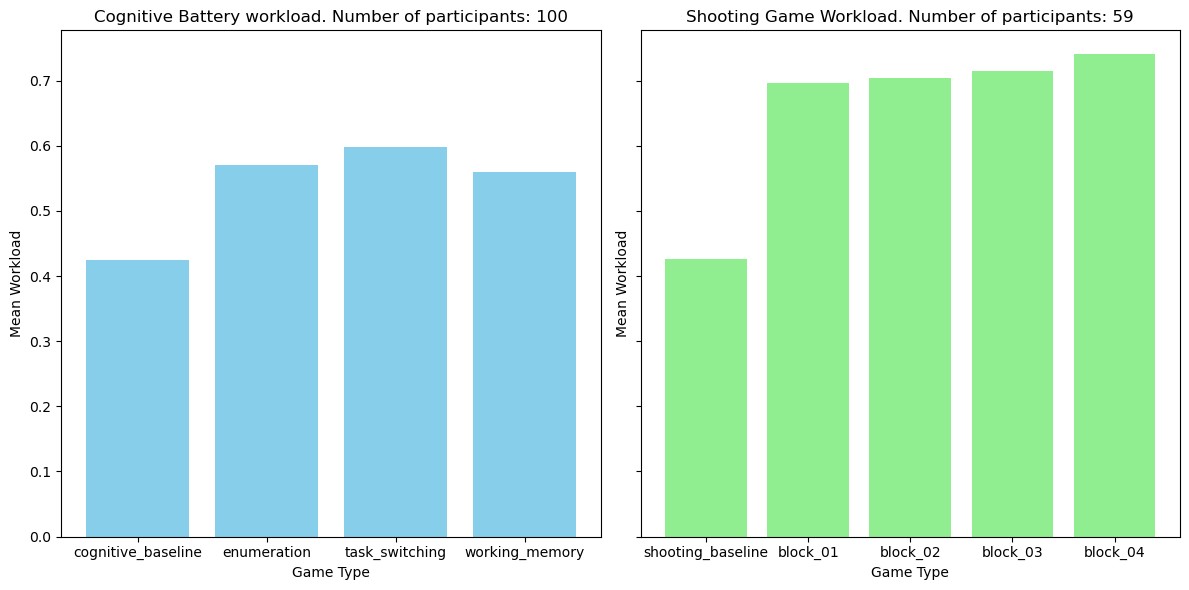

In [120]:
# Calculate mean workload grouped by game_type
cognitive_mean_workload = cognitive_df.groupby('game_type')['workload'].mean()
shooting_mean_workload = shooting_df.groupby('game_type')['workload'].mean()
#change other appear
shooting_mean_workload = shooting_mean_workload.reindex(['shooting_baseline','block_01','block_01','block_02','block_03','block_04'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for cognitive_df
axes[0].bar(cognitive_mean_workload.index, cognitive_mean_workload.values, color='skyblue')
axes[0].set_title('Cognitive Battery workload. Number of participants: ' + str(len(cognitive_df['subject_id'].unique()))   )
axes[0].set_xlabel('Game Type')
axes[0].set_ylabel('Mean Workload')

# Plot for shooting_df
axes[1].bar(shooting_mean_workload.index, shooting_mean_workload.values, color='lightgreen')
axes[1].set_title('Shooting Game Workload. Number of participants: ' + str(len(shooting_df['subject_id'].unique()))   )
axes[1].set_xlabel('Game Type')
axes[1].set_ylabel('Mean Workload')

plt.tight_layout()
plt.savefig(SAVE_DIR + "workload_all.png")
plt.show()

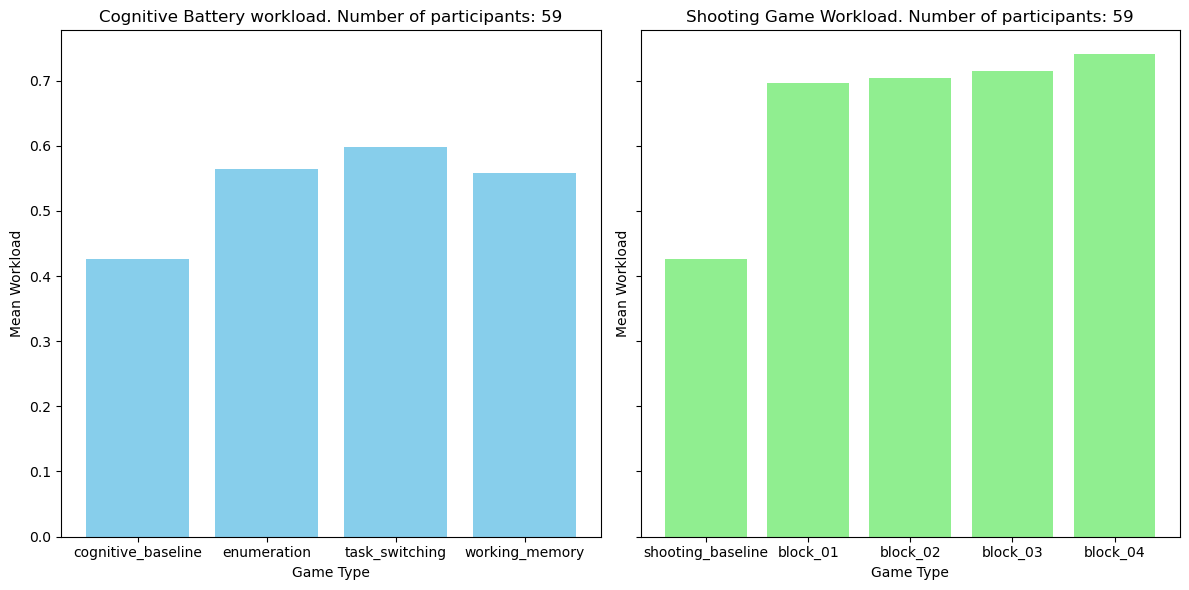

In [121]:
# Calculate mean workload grouped by game_type
temp_df = cognitive_df[cognitive_df['subject_id'].isin(shooting_df['subject_id'].unique())]
cognitive_mean_workload = temp_df.groupby('game_type')['workload'].mean()
shooting_mean_workload = shooting_df.groupby('game_type')['workload'].mean()
#change other appear
shooting_mean_workload = shooting_mean_workload.reindex(['shooting_baseline','block_01','block_01','block_02','block_03','block_04'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for cognitive_df
axes[0].bar(cognitive_mean_workload.index, cognitive_mean_workload.values, color='skyblue')
axes[0].set_title('Cognitive Battery workload. Number of participants: ' + str(len(temp_df['subject_id'].unique()))   )
axes[0].set_xlabel('Game Type')
axes[0].set_ylabel('Mean Workload')

# Plot for shooting_df
axes[1].bar(shooting_mean_workload.index, shooting_mean_workload.values, color='lightgreen')
axes[1].set_title('Shooting Game Workload. Number of participants: ' + str(len(shooting_df['subject_id'].unique()))   )
axes[1].set_xlabel('Game Type')
axes[1].set_ylabel('Mean Workload')

plt.tight_layout()
plt.savefig(SAVE_DIR + "workload_shooting_filtered.png")
plt.show()

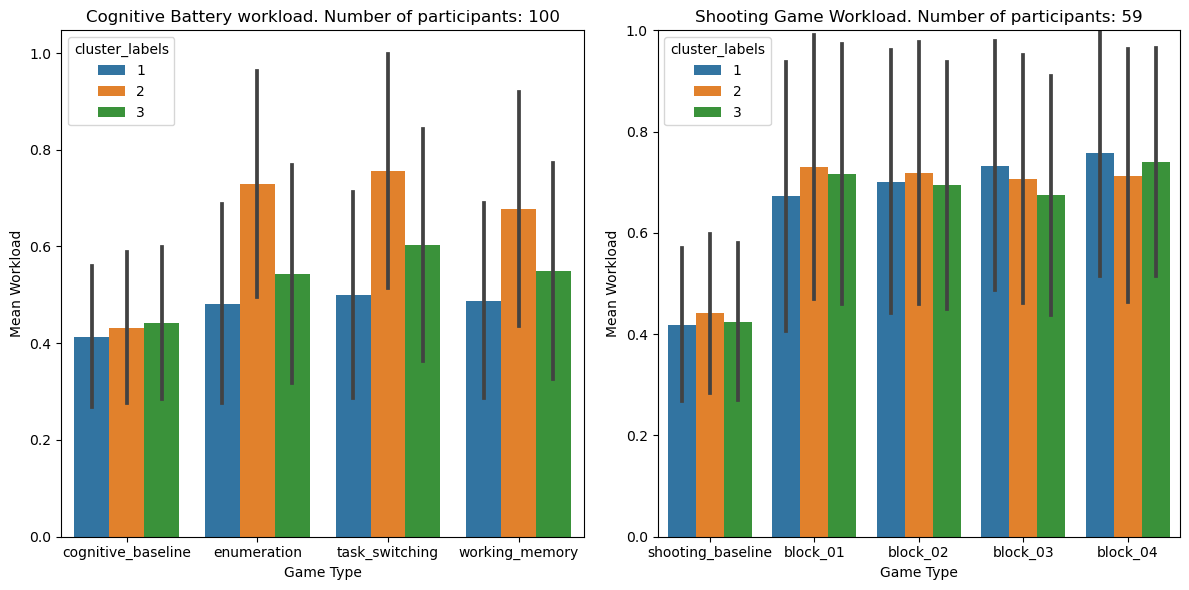

In [134]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for cognitive_df
sns.barplot(x='game_type', y='workload', hue='cluster_labels', data=cognitive_df, ax=axs[0], errorbar='sd')
axs[0].set_title('Cognitive Battery workload. Number of participants: ' + str(len(cognitive_df['subject_id'].unique()))   )
axs[0].set_xlabel('Game Type')
axs[0].set_ylabel('Mean Workload')

# Plot for shooting_df
sns.barplot(x='game_type', y='workload', hue='cluster_labels', data=shooting_df, ax=axs[1], errorbar='sd')
axs[1].set_title('Shooting Game Workload. Number of participants: ' + str(len(shooting_df['subject_id'].unique()))   )
axs[1].set_xlabel('Game Type')
axs[1].set_ylabel('Mean Workload')


plt.ylim(0, 1)
plt.tight_layout()

plt.savefig(SAVE_DIR + "workload_cluster_all.png")
plt.show()

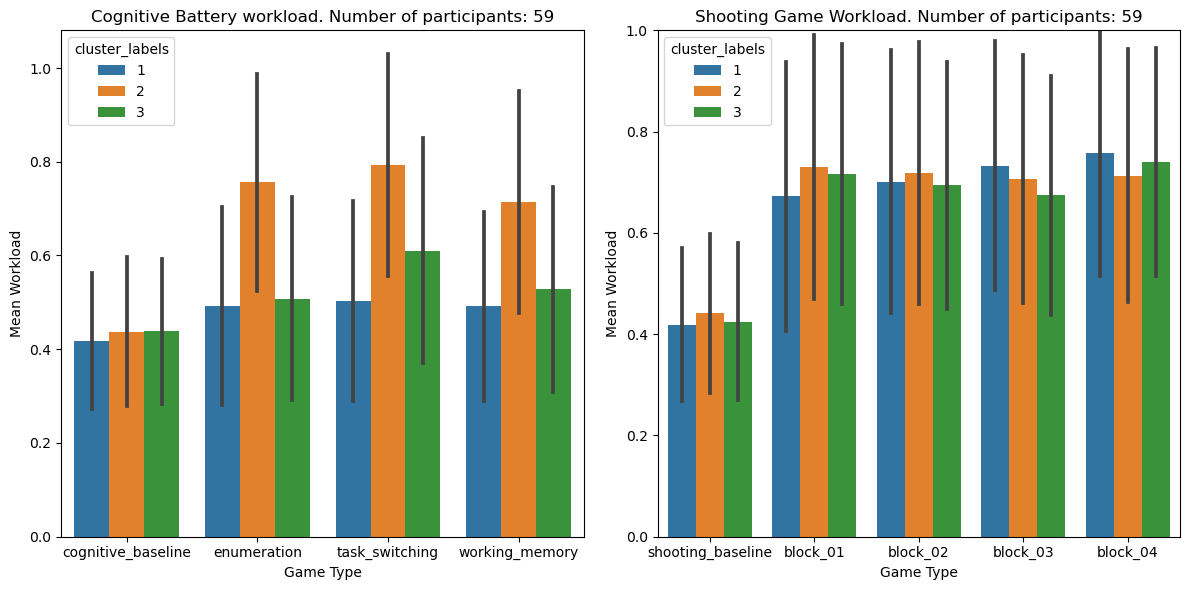

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
temp_df = cognitive_df[cognitive_df['subject_id'].isin(shooting_df['subject_id'].unique())]

# Plot for cognitive_df
sns.barplot(x='game_type', y='workload', hue='cluster_labels', data=temp_df, ax=axs[0], errorbar='sd')
axs[0].set_title('Cognitive Battery workload. Number of participants: ' + str(len(temp_df['subject_id'].unique()))   )
axs[0].set_xlabel('Game Type')
axs[0].set_ylabel('Mean Workload')

# Plot for shooting_df
sns.barplot(x='game_type', y='workload', hue='cluster_labels', data=shooting_df, ax=axs[1], errorbar='sd')
axs[1].set_title('Shooting Game Workload. Number of participants: ' + str(len(shooting_df['subject_id'].unique()))   )
axs[1].set_xlabel('Game Type')
axs[1].set_ylabel('Mean Workload')

plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(SAVE_DIR + "workload_cluster_shooting_filtered.png")
plt.show()

In [162]:
# Group by 'subject_id' and 'game_type', and use the first value of 'cluster_labels'
# Define custom aggregation function to ignore NaN values
def ignore_nan_mean(series):
    return np.nanmean(series)

def ignore_nan_median(series):
    return np.nanmedian(series)

cog_result = cognitive_df.groupby(['subject_id', 'game_type']).agg({
    'workload': [ignore_nan_mean, ignore_nan_median],
    #'hrv': ['mean', 'median'],
    'cluster_labels': 'first'
})

cog_result.columns = ['mean_workload', 'median_workload', 'cluster_labels']
cog_result = cog_result.reset_index()
cog_result

/tmp/ipykernel_100302/1211470412.py:4: RuntimeWarning: Mean of empty slice
  return np.nanmean(series)
/home/qdang1/.conda/envs/tf/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,subject_id,game_type,mean_workload,median_workload,cluster_labels
0,AXSW,cognitive_baseline,0.394981,0.335272,1
1,AXSW,enumeration,0.433661,0.431644,1
2,AXSW,task_switching,0.391075,0.391878,1
3,AXSW,working_memory,0.371460,0.366752,1
4,BHGY,cognitive_baseline,0.452264,0.406275,3
5,BHGY,enumeration,0.625306,0.630366,3
6,BHGY,task_switching,0.596461,0.581127,3
7,BHGY,working_memory,0.543874,0.504901,3
8,BVCX,cognitive_baseline,0.469493,0.437865,3
9,BVCX,enumeration,0.546565,0.434742,3


In [163]:
shooting_result = shooting_df.groupby(['subject_id', 'game_type']).agg({
    'workload':  [ignore_nan_mean, ignore_nan_median],
    #'hrv': ['mean', 'median'],
    'cluster_labels': 'first'
})

shooting_result.columns = ['mean_workload', 'median_workload', 'cluster_labels']
shooting_result = shooting_result.reset_index()
shooting_result

/tmp/ipykernel_100302/1211470412.py:4: RuntimeWarning: Mean of empty slice
  return np.nanmean(series)
/home/qdang1/.conda/envs/tf/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


,subject_id,game_type,mean_workload,median_workload,cluster_labels
0,BVCX,block_01,0.875449,0.991664,3
1,BVCX,block_02,0.912098,0.982995,3
2,BVCX,block_03,0.830773,0.964682,3
3,BVCX,block_04,0.941267,0.987557,3
4,BVCX,shooting_baseline,0.452054,0.438495,3
5,CVBN,block_01,0.728562,0.839514,1
6,CVBN,block_02,0.773150,0.750187,1
7,CVBN,block_03,NaN,NaN,1
8,CVBN,block_04,0.933546,0.949662,1
9,CVBN,shooting_baseline,0.402028,0.338469,1


In [164]:
shooting_result.to_csv(SAVE_DIR + "shooting_game_workload_mean.csv",index=False)
cog_result.to_csv(SAVE_DIR + "cognitive_battery_workload_mean.csv",index=False)